# Python Coursework 
<hr style="border:2px solid black"> </hr>

## Task 1 – Data Gathering and Pre-processing
<hr style="border:2px solid black"> </hr>


*****Implement a process/workflow to extract information from Twitter*****


### Steps of the process: 
1. API connection
2. Data extraction from the data source and data pre-processing from the data source to transform the original data into a pandas dataframe.
3. Perform a data cleansing activity considered relevant for the process (if any).
4. Provide the explanation of the process, the justification behind it, lessons learned and findings. 

***Importing Libraries***

In [1]:
import tweepy
import numpy as np
import pandas as pd

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import networkx as nx

import warnings
warnings.filterwarnings('ignore')
import random

### 1. API connection 

In [2]:
# API Connection

# API keys for Authorization
api_key = ''
api_secret_key = ''
access_token = ''
access_token_secret = ''

# Creating API Connection 
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

# Get user
user = api.get_user(screen_name='twitter')

# Print user name and their followers count for testing
print(user.screen_name) 
print(user.followers_count)

# Run to test

Twitter
60588271


### 2. Data extraction from the data source and data pre-processing from the data source to transform the original data into a pandas dataframe.

Firstly, what data should be analyzed?

In [3]:
# Creates a cursor for extracting items in a users timeline
cursor = tweepy.Cursor(api.user_timeline, screen_name='elonmusk').items(1)

# Get all the attributes of the users timeline by extracting the directories of the cursor 
for x in cursor:
    print(dir(x))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


**The best attributes to analyze are:**

    1. created_at
    2. favorite_count
    3. retweet_count
    4. full_text

In [4]:
"""
Creates a function that extracts the data of a twitter user (input), then puts the needed attributes into lists, 
then creates a pandas dataframe of the last 300 tweets using the lists.
"""
def process_data(user):
    # Initialize empty lists for the attributes
    created_at = []
    favorite_count = []
    retweet_count = []
    full_text = []
    
    # Cursor to extract data
    cursor = tweepy.Cursor(api.user_timeline, screen_name=user, count=300).items()

    # Append data to the lists from the cursor created
    for x in cursor:
        created_at.append(x.created_at)
        favorite_count.append(x.favorite_count)
        retweet_count.append(x.retweet_count)
        full_text.append(x.text)
    
    # Create pandas dataframe from the lists
    df = pd.DataFrame({'time_created':created_at,'likes':favorite_count,'retweets':retweet_count,'tweet':full_text})
    
    # Store only last 300 tweets in df
    df = df.head(300) 
    return df

In [28]:
# Extracting and processing elon musk tweets

df_elon = process_data('elonmusk')
df_elon.head()

,time_created,likes,retweets,tweet
0,2022-01-01 01:58:52+00:00,46679,400,@BLKMDL3 @Tesla 🔥
1,2022-01-01 00:53:13+00:00,1951,90,@MiFSDBetaTester @WholeMarsBlog 🤣
2,2021-12-31 02:23:58+00:00,21221,719,@TheBabylonBee 🤣
3,2021-12-30 21:11:23+00:00,12486,354,@roshanpateI 🤣 $7
4,2021-12-30 20:47:53+00:00,10908,406,@tesla_raj Many UI improvements coming


In [6]:
# Extracting and processing bill gates tweets

df_bill = process_data('billgates')
df_bill.head()

,time_created,likes,retweets,tweet
0,2021-12-30 01:20:15+00:00,1641,220,Heroes like @PumlaNtlabati are spreading impor...
1,2021-12-27 22:49:47+00:00,3511,437,"We have some, but not all, of the tools we nee..."
2,2021-12-26 18:34:19+00:00,6423,629,The world has lost a hero. Archbishop Desmond ...
3,2021-12-24 00:30:44+00:00,4978,630,One of my favorite holiday traditions is shari...
4,2021-12-23 01:06:40+00:00,3462,694,Mamello Makhele is a hero from Lesotho who tra...


In [7]:
# Extracting and processing kanye west tweets

df_ye = process_data('kanyewest')
df_ye.head()

,time_created,likes,retweets,tweet
0,2020-11-04 09:04:50+00:00,387423,39241,KANYE 2024 https://t.co/Zm2pKcn12t
1,2020-11-03 20:53:31+00:00,205307,7621,I VOTED 🇺🇸 https://t.co/hlgIJUST4x
2,2020-11-03 20:51:55+00:00,79437,2891,KANYE2020 🇺🇸 https://t.co/3kd8vrrHZQ
3,2020-11-03 20:50:49+00:00,64768,1908,🕊 https://t.co/tFqpKyQzkY
4,2020-11-03 20:42:45+00:00,74706,3646,The first vote of my life We are here ...


###### Making sure 300 tweets for each account
If not, re-run the cell of the user(s) that did not have 300 tweets, and re-run the cell below to check

In [29]:
print(f"Elon: {len(df_elon)} \nBill: {len(df_bill)} \nKanye: {len(df_ye)}")

Elon: 300 
Bill: 300 
Kanye: 300


### 3. Perform a data cleansing activity considered relevant for the process (if any)

###### Checking how many tweets contain RT

In [30]:
rt_elon = df_elon.tweet.str.contains("RT")
rt_bill = df_bill.tweet.str.contains("RT")
rt_ye = df_ye.tweet.str.contains("RT")

# Show how many retweets per account
print('Elon: ', rt_elon.sum(), '\nBill: ', rt_bill.sum(), '\nYe: ', rt_ye.sum())

Elon:  6 
Bill:  41 
Ye:  26


###### Remove tweets containing RT

In [31]:
df_elon_clean = df_elon[~rt_elon]
df_bill_clean = df_bill[~rt_bill] 
df_ye_clean = df_ye[~rt_ye]

# To test
df_elon_clean.count()

time_created    294
likes           294
retweets        294
tweet           294
dtype: int64

6 rows removed as required

### 4. Provide the explanation of the process, the justification behind it, lessons learned and findings

**1.** API Connection gets created, which will give us access to twitter's API to be able to extract data from twitter accounts for analysis.<br/><br/><br/>
**2.**<br/><br/>
    **In [3]:** Creates a cursor, a function by the tweepy library. The purpose is to help know what attributes can be extracted and analysed. It will extract the directories of the items of the pages in a cursor. <br/><br/>
    **In [4]:** Since there are 3 accounts needed to be analyzed, a function (process_data) was created, which basically extracts the data of a twitter user. The steps taken were initializing the needed attributes into empty lists, then creating a cursor which will extract the last 300 tweets of a user based on the input. Then, a for loop created basically iterates through all the created_at, favorite_count, etc. pages, and then appends the values to the lists that were initialized. Then creates a pandas dataframe of the lists. The function will return the pandas dataframe with the user's tweets data. <br/><br/>
    **In [5-7]:** Uses the process_data function for each account. There were instances were there will not be 300 tweets because of requests limit.. in this case, we would just re-run the code(s) until it shows that there are 300 tweets. <br/><br/><br/>
**3.** Retweets (RT) are tweets usually not by the account themselves, some of them have only 0 likes, it would be best to remove these to have only the tweets made by the accounts themselves.

## Task 2– Exploratory Data Analysis (EDA)
<hr style="border:2px solid black"> </hr>

*****Merge the information of the accounts and perform an EDA on the conjoint data to
explain the nature of it.*****

### Steps of the process:
1. Comparison between accounts, e.g. number of followers, are the accounts producing original twits or mostly retweeting, etc.
2. What users/accounts are more mentioned? Are there any favourite accounts among the influencers/accounts selected? What are the twits that have the most likes? What twits have been retweeted the most? Which one is the most successful account considering these two variables? At least three points should be taken for the analysis.
3. Any other analysis that you consider relevant.
4. Provide the explanation of the process, the justification behind it, lessons learned and findings. 

###### First, combine all the dataframes into one, for analysis by doing so:
   1. Add a new column in each dataframe with the name of the account
   2. Concatenate dataframes into one

In [32]:
# Add new column 
df_elon_clean['user'] = 'elonmusk'
df_bill_clean['user'] = 'billgates'
df_ye_clean['user'] = 'kanyewest'

# Concatenate df's
frames = [df_elon_clean, df_bill_clean, df_ye_clean]
df = pd.concat(frames)
df.head()

,time_created,likes,retweets,tweet,user
0,2022-01-01 01:58:52+00:00,46679,400,@BLKMDL3 @Tesla 🔥,elonmusk
1,2022-01-01 00:53:13+00:00,1951,90,@MiFSDBetaTester @WholeMarsBlog 🤣,elonmusk
2,2021-12-31 02:23:58+00:00,21221,719,@TheBabylonBee 🤣,elonmusk
3,2021-12-30 21:11:23+00:00,12486,354,@roshanpateI 🤣 $7,elonmusk
4,2021-12-30 20:47:53+00:00,10908,406,@tesla_raj Many UI improvements coming,elonmusk


### 1. Comparison between accounts: Number of followers, Are the accounts producing original twits or mostly retweeting, which accounts with most likes and retweets, etc.

###### Compare number of followers

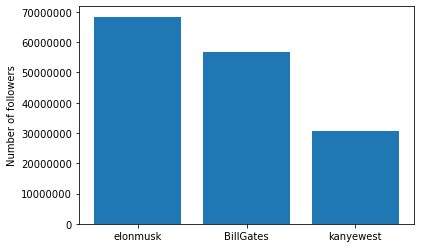

In [34]:
# Get users
elon = api.get_user(screen_name='elonmusk')
bill = api.get_user(screen_name='billgates')
ye = api.get_user(screen_name='kanyewest')

# Get number of followers
no_of_followers = {elon.screen_name : elon.followers_count, bill.screen_name : bill.followers_count, ye.screen_name : ye.followers_count}

# Plot a bar chart to compare number of followers
plt.bar(range(len(no_of_followers)), list(no_of_followers.values()), align='center')
plt.xticks(range(len(no_of_followers)), list(no_of_followers.keys()))
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Number of followers')
plt.show()

Elon has the most followers. Bill has a little less than Elon. Kanye has around half the followers Elon has. 

###### Accounts producing original twits or mostly retweeting
For this, in step 3 in task 1, when cleaning the data, we saved how many retweets each users have, (rt_elon, ..), to visualize it

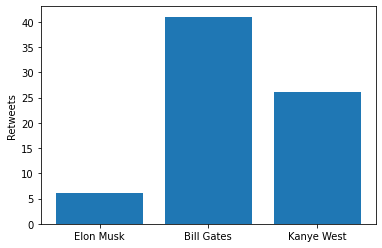

In [35]:
# In the data cleaning step, the retweets for elon, bill and kanye are under the variables rt_elon, rt_bill and rt_ye 

twt_or_rt = {'Elon Musk' : rt_elon.sum(), 'Bill Gates' : rt_bill.sum(), 'Kanye West' : rt_ye.sum()}

plt.bar(range(len(twt_or_rt)), list(twt_or_rt.values()), align='center')
plt.xticks(range(len(twt_or_rt)), list(twt_or_rt.keys()))
plt.ylabel('Retweets')
plt.show()

Bill Gates retweets more often than Elon Musk and Kanye West, with Kanye slightly more often the Elon. Bill Gates retweets more than twice as often than Elon does.

###### Compare number of likes and retweets between accounts

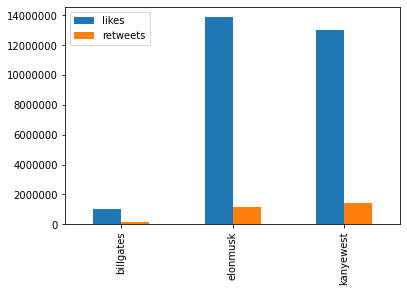

In [36]:
# Create pivot table
table = pd.pivot_table(data=df,index=['user'],values=['likes', 'retweets'],aggfunc='sum')
# Plot bar chart
table.plot.bar(xlabel='').ticklabel_format(style='plain', axis='y')

Elon has the most likes, and Kanye has the most retweets. Both Elon and Kanye have similar influence. Bill Gates does not get much likes or retweets. All influencers have much less retweets than their likes, which is expected. 

### 2. What users/accounts are more mentioned? Are there any favourite accounts among the influencers/accounts selected? What are the twits that have the most likes? What twits have been retweeted the most? Which one is the most successful account considering these two variables? At least three points should be taken for the analysis.

###### What users/accounts are more mentioned? 

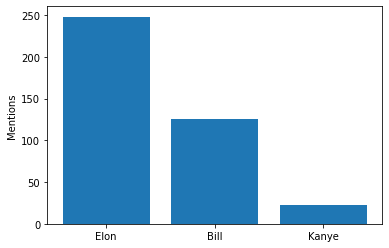

In [37]:
at_elon = df_elon.tweet.str.contains("@")
at_bill = df_bill.tweet.str.contains("@")
at_ye = df_ye.tweet.str.contains("@")

# Show how many mentions per account
mentions = {'Elon':at_elon.sum(), 'Bill':at_bill.sum(), 'Kanye':at_ye.sum()}

# Visualize
plt.bar(range(len(mentions)), list(mentions.values()), align='center')
plt.xticks(range(len(mentions)), list(mentions.keys()))
plt.ylabel('Mentions')
plt.show()

It appears that Elon Musk has the most mentions, having more mentions than Bill and Kanye combined. Kanye has a very low amount of mentions compared to the rest

###### What are the twits that have the most likes? (top 5-10 tweets)

In [38]:
df.nlargest(10,'likes')

,time_created,likes,retweets,tweet,user
257,2020-09-16 17:13:33+00:00,726824,159156,Trust me ... I WONT STOP https://t.co/RmVkqrSa4F,kanyewest
271,2021-12-08 17:21:49+00:00,617479,66606,https://t.co/FJaW6L5ba0,elonmusk
89,2021-12-20 02:24:01+00:00,607173,57746,"For those wondering, I will pay over $11 billi...",elonmusk
197,2021-12-12 22:25:09+00:00,602990,46180,https://t.co/KPQrN13zr9,elonmusk
38,2021-12-25 20:17:37+00:00,528521,31487,Merry Christmas 🎄🎁 ⛄️ ⭐️ 😃,elonmusk
33,2021-12-26 12:28:15+00:00,440381,35562,https://t.co/Scr3Ub3tgT,elonmusk
246,2021-12-10 03:56:22+00:00,426161,32273,thinking of quitting my jobs &amp; becoming an...,elonmusk
247,2021-12-10 02:51:25+00:00,402081,38041,https://t.co/ZrZ1EfLYWy,elonmusk
153,2021-12-16 04:35:40+00:00,393181,39071,https://t.co/Wv6iJDuTge,elonmusk
0,2020-11-04 09:04:50+00:00,387423,39241,KANYE 2024 https://t.co/Zm2pKcn12t,kanyewest


###### What twits have been retweeted the most? (top 5-10 retweets)

In [39]:
df.nlargest(10,'retweets')

,time_created,likes,retweets,tweet,user
257,2020-09-16 17:13:33+00:00,726824,159156,Trust me ... I WONT STOP https://t.co/RmVkqrSa4F,kanyewest
98,2020-10-12 22:06:49+00:00,156266,85655,I stand with my Nigerian brothers and sisters ...,kanyewest
202,2020-09-22 12:33:11+00:00,258576,78983,WINNING IS THE ONLY OPTION,kanyewest
271,2021-12-08 17:21:49+00:00,617479,66606,https://t.co/FJaW6L5ba0,elonmusk
101,2021-12-19 19:17:57+00:00,311237,63688,Should be taught to all at a young age https:/...,elonmusk
89,2021-12-20 02:24:01+00:00,607173,57746,"For those wondering, I will pay over $11 billi...",elonmusk
12,2021-12-30 06:18:38+00:00,335774,54160,https://t.co/mVhCpxVPZI,elonmusk
183,2021-12-14 10:34:23+00:00,364756,53006,Tesla will make some merch buyable with Doge &...,elonmusk
121,2020-09-26 13:51:48+00:00,255310,51365,BELIEVE WHAT I SAY (snippet) https://t.co/U7Y2...,kanyewest
197,2021-12-12 22:25:09+00:00,602990,46180,https://t.co/KPQrN13zr9,elonmusk


###### Which one is the most successful account considering these two variables?

Although Elon Musk does not have the most liked tweet, he has the most tweets with the most likes. Kanye has the top retweets, and has both the most liked and retweeted tweet from the 3 accounts. Bill Gates has no tweet in the top 10 liked and retweeted posts. The most successful is between Elon and Kanye, but Elon with a bigger advantage.

### 3. Any other analysis that you consider relevant.

###### Which accounts have the least tweets and retweets

In [40]:
df.nsmallest(10,'likes')

,time_created,likes,retweets,tweet,user
253,2021-03-05 20:43:38+00:00,16,3,@EDFaction @Breakthrough Thank you for your pa...,billgates
285,2021-02-16 18:18:15+00:00,16,5,@CliftonLeaf Thanks for inviting me to be a gu...,billgates
281,2021-02-18 00:56:30+00:00,28,4,@CBSEveningNews @NorahODonnell Thank you @Nora...,billgates
269,2021-02-20 22:09:10+00:00,44,7,@smh Thanks @GregCallaghan1 for talking with m...,billgates
258,2021-02-28 19:59:36+00:00,63,13,@EU_H2020 @EIB @Breakthrough @BloomBiorenewa1 ...,billgates
126,2021-09-17 17:17:35+00:00,242,24,Initial projections about the pandemic’s impac...,billgates
86,2021-10-20 04:05:14+00:00,256,21,"We’ve done this before. In 2017, the @gatesfou...",billgates
26,2021-11-29 22:20:46+00:00,347,30,Experts like Trevor Bedford have done an excel...,billgates
156,2021-08-09 22:58:31+00:00,351,41,"Avoiding a disaster will require courage, ambi...",billgates
155,2021-08-09 22:58:31+00:00,419,35,Every climate action we take must be toward th...,billgates


In [41]:
df.nsmallest(10,'retweets')

,time_created,likes,retweets,tweet,user
253,2021-03-05 20:43:38+00:00,16,3,@EDFaction @Breakthrough Thank you for your pa...,billgates
281,2021-02-18 00:56:30+00:00,28,4,@CBSEveningNews @NorahODonnell Thank you @Nora...,billgates
285,2021-02-16 18:18:15+00:00,16,5,@CliftonLeaf Thanks for inviting me to be a gu...,billgates
269,2021-02-20 22:09:10+00:00,44,7,@smh Thanks @GregCallaghan1 for talking with m...,billgates
258,2021-02-28 19:59:36+00:00,63,13,@EU_H2020 @EIB @Breakthrough @BloomBiorenewa1 ...,billgates
86,2021-10-20 04:05:14+00:00,256,21,"We’ve done this before. In 2017, the @gatesfou...",billgates
126,2021-09-17 17:17:35+00:00,242,24,Initial projections about the pandemic’s impac...,billgates
26,2021-11-29 22:20:46+00:00,347,30,Experts like Trevor Bedford have done an excel...,billgates
266,2021-02-24 15:48:38+00:00,517,32,@colbertlateshow @gatesfoundation I always hav...,billgates
155,2021-08-09 22:58:31+00:00,419,35,Every climate action we take must be toward th...,billgates


Bill Gates has the least liked and retweeted tweets compared to both accounts..

###### Which accounts have the most tweets and been most active in December 2021?

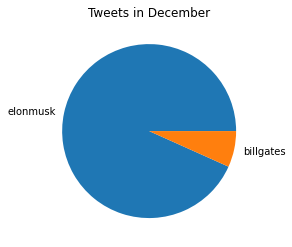

In [42]:
# Store tweets in November in df_nov
df_nov = df[pd.to_datetime(df['time_created']).dt.month == 12]
# Count tweets for each user in df_nov
pie_values = df_nov.user.value_counts()
# Plot pie chart
pie_chart = pie_values.plot(kind='pie', ylabel='', title='Tweets in December')

Elon Musk has the most tweets was clearly the most active in December, over 75% of the tweets in December from the accounts were from Elon. Kanye West has not tweeted in December at all.

###### Are there any favourite accounts among the influencers/accounts selected? (most likes, retweets, followers, mentions, active)
<br/>
Bill Gates has the least amount of likes, retweets and is not so active, and retweets more than posts tweets. Being the least successful account.
<br/><br/>
Kanye's tweets are the most successful when in getting the highest liked and retweeted post(s), although he is the least active. He also is not so mentioned, and has the least amount of followers.
<br/><br/>
Elon's tweets are the most successful when it comes to the most followers, the most mentions, and the most active account in December. And is successful in obtaining tweets that generate a high amount of likes and retweets.

### 4. Provide the explanation of the process, the justification behind it, lessons learned and findings. 

In order to begin the data analysis, the matplotlib library has been imported, it has already been done in task one. Also the pandas plot() function has helped when visualising the data. When comparing the number of followers, if a user tweets or retweets more, and the accounts that have been mentioned most have all been visualised using bar charts from the matplotlib library. The visualisation of the comparison of likes and retweets was created using pandas built-in function plot().bar(). The chart plotted the values from a pivot table that has the count for both the likes and retweets for all the three influencers. The comparison of the most active account was done using a pie chart from the pandas plot() function that extracted the number of tweets that have been tweeted per user in November. When comparing the top 10 liked and retweeted tweets, nlargest/nsmallest function by pandas has been used. Since this would be the best way to know which tweets specifically generated the highest likes/retweets. <br/><br/>

The following table will show the summary of the findings obtained from the analysis. On each row, will represent the question and the users will be rated from 1-3 (1 being the most successful), except for the top 10 likes and retweets which will show how many likes or retweets are in the top 10 based on the user. <br/><br/>

|                               |Elon Musk|Bill Gates|Kanye West|
|:------------------------------|:--------|:---------|:---------|
|**Followers**                  |1        |2         |3         |
|**Retweets most**              |3        |1         |2         |
|**Likes and Retweets**         |1        |3         |2         |
|**Mentions**                   |1        |2         |3         |
|**Most Active in November**    |1        |2         |3         |
|**Tweets in top 10 likes**     |8 times  |0 times   |2 times   |
|**Tweets in top 10 retweets**  |6 times  |0 times   |4 times   |

<br/><br/>

To summarize, Elon Musk is the most successful account overall. Kanye West is more successful than Bill Gates except for the amount of followers, mentions, and is slightly more active. But Kanye does have the most liked and retweeted tweet. Kanye also retweets less than Bill, making Kanye the second most successful account.

## Task 3 – Network analysis
<hr style="border:2px solid black"> </hr>

*****The goal of this task is to create a network that represents the area of influence of the
accounts/influencers selected. For this you need to consider the network as
bidirectional, there are two ways to do it: you can extract the accounts that the
influencer is following and/or create the links from the accounts that were retweeted.*****

### Steps of the process:
1. Explanation and justification of the data pre-processing implemented (if any).
2. Provide a sample (max 10 records) of the edge list and the neighbour list of the network.
3. Produce a visualisation of the network topology and discuss the output.
4. Calculate statistics of the network, plot them where relevant, and discuss the results, explaining the meaning of any statistics you have calculated.
* Statistics of the network such as
    * Degree Distribution
    * Cluster coefficient
    * Betweenness Centrality
    * Assortativity
5. Conclusions and lessons learned.

### 1. Explanation and justification of the data pre-processing implemented (if any)

In [43]:
# Initialize the graph
g = nx.Graph()

# Add the main nodes
g.add_node('elonmusk')
g.add_node('billgates')
g.add_node('kanyewest')

In [44]:
"""
Function to get list of the users that the account being analysed retweeted
The input is the DataFrame of the separate user
Function returns the users that are retweeted, to be able to add to the network.
"""
def retweet_nodes(df):
    # Initalize list to extract the retweets
    retweet_tweets = []
    # Initalize list to extract the names
    retweet_names = []
    
    # Append tweets that have an "RT" from the dataframe to retweet_tweets list
    for i in df.tweet:
        if "RT" in i:
            retweet_tweets.append(i)
    
    # Slice the retweets in the retweets_tweets to extract only the name of the account that made the retweet
    for x in retweet_tweets:
        # Slice the tweets to return only username
        # Starts from 4th index because the retweet text begins with RT @username 
        y = x[4:x.index(':')]
        # Reduce errors, since usernames have no space
        if ' ' not in y:
            # Add to retweet_names set
            retweet_names.append(y)
    
    # Returns the names of the accounts
    return retweet_names   

In [45]:
# Function to extract the list of accounts a user is following, then returns a list of those accounts
def following_nodes(user):    
    following = []
    for i in tweepy.Cursor(api.get_friends, screen_name=user).items():
        following.append(i.screen_name)
    return following  

In [46]:
# Adds the nodes and edges of the retweets/following names, based on the account being analysed
def add_nodes_and_edges(n, user):    
    # Add the nodes and edges for all the accounts
    for i in n:    
        g.add_node(i)
        g.add_edge(i, user)         

In [47]:
# Add nodes and edges of the retweeters
add_nodes_and_edges(retweet_nodes(df_elon), 'elonmusk')
add_nodes_and_edges(retweet_nodes(df_bill), 'billgates')
add_nodes_and_edges(retweet_nodes(df_ye), 'kanyewest')   

# Get the names of accounts the user is following
f_elon = following_nodes('elonmusk')
f_bill = following_nodes('billgates')
f_ye = following_nodes('kanyewest')

# Add nodes and edges of the accounts followed by the users
add_nodes_and_edges(f_elon, 'elonmusk')
add_nodes_and_edges(f_bill, 'billgates')
add_nodes_and_edges(f_ye, 'kanyewest')

Rate limit reached. Sleeping for: 891
Rate limit reached. Sleeping for: 889


###### Explanation and Justification

1. When cleaning the data in Task 1, the dataframe with the retweets is still saved. So this will make it easy to extract. A function was made to extract the accounts for each user, to be able to add them as nodes or edges to the network later on. 
2. A function was made to extract the account names a user is following. This uses the api's get_friends function and a cursor from tweepy to extract screen names of the items in the cursor, returning a list of the accounts names.
3. A function was made to add the nodes and edges into the network. Basically this will be used so that directly the nodes and edges will be added with the input of either the function made to extract the retweets names or followings names. 
4. When calling the following_nodes() function, there will be a TooManyRequests error where there can only be a limited number of requests within a time interval, in this case 15 minutes. To get past through this, when obtaining the API Connection in Task 1, in the line where there is api = tweepy.API(auth, wait_on_rate_limit=True). When setting the wait_on_rate_limit to true, it will tell the api to automatically wait 15 min if too many requests have been called. This can be done instantly in another way by extracting the api.friends based on the user in a for loop, but this way has limitations by showing only maximum of 20 users. Therefore, this method was decided to be the best solution to extract all the users.

### 2. Provide a sample (max 10 records) of the edge list and the neighbour list of the network.

###### Edges List

In [48]:
edges_sample = random.sample(g.edges(), 10)
edges_sample

[('billgates', 'Microsoft'),
 ('billgates', 'sapinker'),
 ('billgates', 'EndPolioNow'),
 ('elonmusk', 'Rainmaker1973'),
 ('billgates', 'josh_jarrett'),
 ('kanyewest', 'SheckJesus'),
 ('billgates', 'NickKristof'),
 ('kanyewest', 'BustaRhymes'),
 ('kanyewest', 'astrxx_2'),
 ('billgates', 'KIPP')]

###### Neighbors List

In [52]:
# Create an empty dictionary
network = {}
for (a,b) in g.edges():
    #Check if key is in dictionary
    if a in network:
        network[a].add(b)
    else:
        network[a]={b}
     #Check if key is in dictionary
    if b in network:
        network[b].add(a)
    else:
        network[b]={a}
        
# Extracts random 10 nodes with their neighbors        
keys = random.sample(list(network), 10)
values = [network[k] for k in keys]
neighbors = dict(zip(keys, values))
neighbors

{'jack': {'elonmusk', 'kanyewest'},
 'shivon': {'elonmusk'},
 'rogerfedererfdn': {'billgates'},
 'overdramatique': {'kanyewest'},
 'ENERGY': {'billgates'},
 'B_hundred_Hyun': {'kanyewest'},
 'mycoolnewshoes': {'kanyewest'},
 'Bill_Gross': {'billgates'},
 'dogecoin_devs': {'elonmusk'},
 'TheAtlantic': {'billgates'}}

### 3. Produce a visualisation of the network topology and discuss the output.

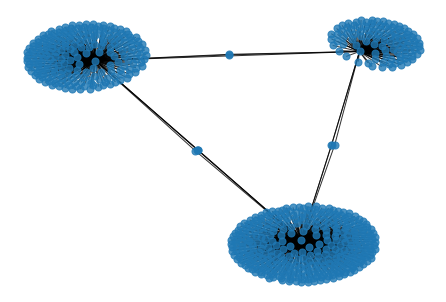

In [53]:
# Visualise the graph
G=g
layout = nx.spring_layout(G)
nx.draw(G,pos=layout,node_size=50,alpha=0.8)

The output shows that all the influencers either follow or retweet from a few of the same people between each others. The 3 influencers do not follow or retweet the same people all together. Judging by the size of each of the main influences, there is not much connections between these influencers.

### 4. Calculate statistics of the network, plot them where relevant, and discuss the results, explaining the meaning of any statistics you have calculated.

###### Degree Distribution

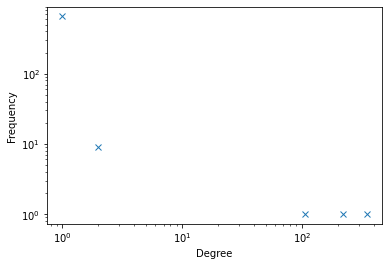

In [54]:
# Calculation of degree distribution
dd = nx.degree_histogram(g)

# Show nodes without degree of 0
ddist = dd[1:] # Skip 0 degree nodes
plt.loglog(range(1,len(ddist)+1),ddist,'x')
plt.xlabel("Degree")
plt.ylabel("Frequency") 
plt.show()

The degree distribution of this network shows us that the high majority of the nodes do not have edges (other than their original edge), which would mean those nodes do not get followed and/or retweets from more than one influencer. Throughout the rest of the network, rarely the rest of the nodes are followed and/or retweeted from more than one influencer.

###### Cluster coefficient

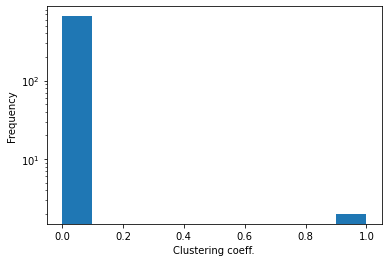

In [55]:
# Calculating 
cc = nx.clustering(g)

# Plotting including coeff of 0
plt.hist(list(cc.values()),bins=10)
plt.yscale("log")
plt.ylabel("Frequency")
plt.xlabel("Clustering coeff.")
plt.show()

The chart represents to us the clustering coeffiecient of the nodes, which will basically present which nodes are also part of neighbor nodes. It is clear that there are rarely nodes that have neighbor nodes.

###### Betweenness Centrality

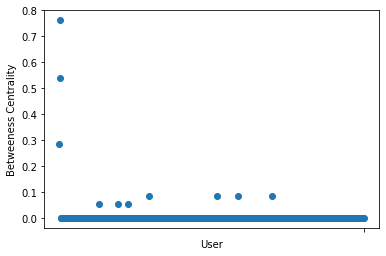

In [56]:
bc = nx.betweenness_centrality(g)
x = list(bc.keys())
y = list(bc.values())

plt.scatter(x, y)
plt.xticks('')
plt.xlabel('User')
plt.ylabel('Betweeness Centrality')
plt.show()

This chart will represent to us the level of importance of the nodes in the network in terms of connecting other influencers region. As shown, the high majority of these nodes are 0. There are 3 nodes by the left side of the chart showing high betwenesses centrality, these are highly likely to be the main influencers. There are 7 other nodes that have importance when connecting the influencers region in the network.

In [57]:
# Show nodes with betweeness centrality thats not 0
bc_nodes = {}
for i in bc:
    if bc[i] != 0:
        bc_nodes[i] = bc[i]
bc_nodes     

{'elonmusk': 0.2855416494679444,
 'billgates': 0.7623548492612986,
 'kanyewest': 0.5406204650534898,
 'MKBHD': 0.05311485113044251,
 'Malala': 0.05311485113044251,
 'khanacademy': 0.05311485113044251,
 'jimmyfallon': 0.08293662692138931,
 'BillClinton': 0.08293662692138931,
 'LeoDiCaprio': 0.08293662692138931,
 'BarackObama': 0.08293662692138931}

This dictionary shows the nodes that do not have a betweeness centrality of 0, with their value. Meaning they are either followed and/or retweeted by 2 of the 3 influencers. 

###### Assortativity

In [58]:
nx.degree_assortativity_coefficient(g)

-0.8141727131388174

The assortavity coefficient shows that the nodes in the network has a very weak tendency to interact with other similar nodes.

### 5. Conclusions and lessons learned.

In this process, a network topology between the influencers, the accounts they follow and the accounts that the influencers between from were visualised and analysed. These accounts are extracted as shown in step 1, and they are added as nodes to the graph and the edges of those nodes between the accounts and the influencers will be added. Then the network topology is visualised with the help of the NetworkX library. Visualisations of the network and statistical analysis of the network shows that there are only a few connections between the influencers, and that all the three influencers do not share a common connection. To conclude, there is not much connection between the influencers.